In [inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling), we use the inverse cumulative distribution function (CDF) to generate random numbers in a given distribution. But why does this work?

This post takes a look at a couple different approaches to understand this. Experimentally, we can see that the distribution of the CDF over the sample values is uniform. And this fact is why inverse transform sampling works.

# Definitions

Let's start with some of the definitions we will use. We want to generate random numbers according to a given *probability density function* (PDF) $f(x)$. The probability density function $f(x)$ and the *cumulative distribution function* $F(x)$ are related to each other by an integral:

$$
F(x) = \int f(x) dx
$$

Let's start with a simple experimental observation of normally distributed random numbers.

Let's start with a simple density function, the uniform density function *U* in the interval $[0, 1]$. The probability density is constant everywhere in the interval:

$$
F_U(x) = \int cdx = cx+d
$$

We can use the following two constraints, $U(0)=0$ and $U(1)=1$, to obtain

$$
F_U(x) = x.
$$

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# The CDF of a sample is uniformly distributed

Inverse transform sampling works, because when we plug values of random variable $X$ into its own CDF $F_X$, we obtain numbers which are uniformly distributed in $[0, 1]$. I.e., the shape of $F_X(X)$ is uniform.

Let's observe the distribution we obtain from the normal distribution's CDF over normally distributed random numbers.

In [2]:
rng = np.random.default_rng()

(array([1033., 1003.,  975.,  976.,  982., 1030., 1024., 1013.,  991.,
        1052.,  960., 1029.,  965.,  974.,  996.,  996.,  948., 1014.,
         951.,  988., 1032.,  988.,  996.,  973., 1042., 1011.,  982.,
        1044., 1010.,  988.,  967.,  986., 1026.,  986., 1044.,  966.,
        1000.,  969., 1063., 1018., 1042.,  966., 1003., 1004., 1019.,
         995.,  997., 1016.,  960., 1007.]),
 array([5.00967858e-06, 2.00046623e-02, 4.00043150e-02, 6.00039676e-02,
        8.00036203e-02, 1.00003273e-01, 1.20002926e-01, 1.40002578e-01,
        1.60002231e-01, 1.80001883e-01, 2.00001536e-01, 2.20001189e-01,
        2.40000841e-01, 2.60000494e-01, 2.80000147e-01, 2.99999799e-01,
        3.19999452e-01, 3.39999105e-01, 3.59998757e-01, 3.79998410e-01,
        3.99998063e-01, 4.19997715e-01, 4.39997368e-01, 4.59997021e-01,
        4.79996673e-01, 4.99996326e-01, 5.19995978e-01, 5.39995631e-01,
        5.59995284e-01, 5.79994936e-01, 5.99994589e-01, 6.19994242e-01,
        6.39993894e-01, 

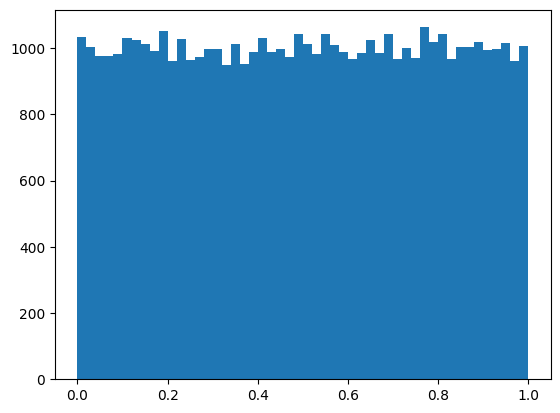

In [16]:
cdf_normal = lambda x : 0.5 * (1.0 + math.erf(0.7071067811865475 * x))

n = rng.normal(loc=0.0, scale=1.0, size=50000)
x = np.array([cdf_normal(x) for x in n])
plt.hist(x, bins=50)

We obtain a very nice uniform distribution of values between 0 and 1.

Using the definition of the CDF,

$$
F_X(x) = P(X \le x),
$$

we also arrive at the conclusion that the distribution of $F_X(X)$ is uniform. Let's assign $Z = F_X(X)$ and use the definition of the CDF on it:

$$
F_Z(x) = P(F_X(X) \le x) = P(F^{-1}_{X}(F_X(X)) \le F^{-1}_{X}(x)) = P(X \le F^{-1}_X(x)) \\
\therefore F_Z(x) = F_X(F^{-1}_X(x)) = x
$$

The shape of $F_Z(x)$ is that of the uniform distribution *U* that we calculated earlier!


# Generating random numbers using inverse transform sampling

We can now generate random numbers in the shape of any given density function using the recipe:
1. Given a PDF, calculate the CDF using the integral equation.
2. Take the inverse of the CDF.
3. Plug your uniformly distributed random numbers into the inverse CDF.

For example, to generate random numbers according to the density function $f(x)=x^2$, we can apply the recipe as follows.

First, we obtain the CDF.

$$
F(x) = \int x^2dx = C \frac{x^3}{3}
$$

Using our constraints $F(0)=0$ and $F(2)=1$, we get

$$
F(x) = \frac{1}{8}x^3.
$$

Next, let's take the inverse of $F(x)$:

$$
F^{-1}(x) = (8x)^{\frac{1}{3}}
$$

Finally, we can plug numbers into our inverse function.

(array([   3.,    7.,   14.,   23.,   35.,   39.,   42.,   82.,  112.,
         138.,  139.,  194.,  201.,  253.,  279.,  336.,  354.,  372.,
         402.,  462.,  514.,  569.,  636.,  728.,  748.,  798.,  835.,
         939.,  979., 1107., 1113., 1161., 1254., 1275., 1442., 1520.,
        1624., 1677., 1799., 1838., 1987., 2144., 2098., 2235., 2351.,
        2502., 2473., 2566., 2756., 2845.]),
 array([0.04193111, 0.08109244, 0.12025376, 0.15941508, 0.19857641,
        0.23773773, 0.27689905, 0.31606038, 0.3552217 , 0.39438302,
        0.43354435, 0.47270567, 0.51186699, 0.55102832, 0.59018964,
        0.62935096, 0.66851229, 0.70767361, 0.74683493, 0.78599625,
        0.82515758, 0.8643189 , 0.90348022, 0.94264155, 0.98180287,
        1.02096419, 1.06012552, 1.09928684, 1.13844816, 1.17760949,
        1.21677081, 1.25593213, 1.29509346, 1.33425478, 1.3734161 ,
        1.41257742, 1.45173875, 1.49090007, 1.53006139, 1.56922272,
        1.60838404, 1.64754536, 1.68670669, 1.72586801, 

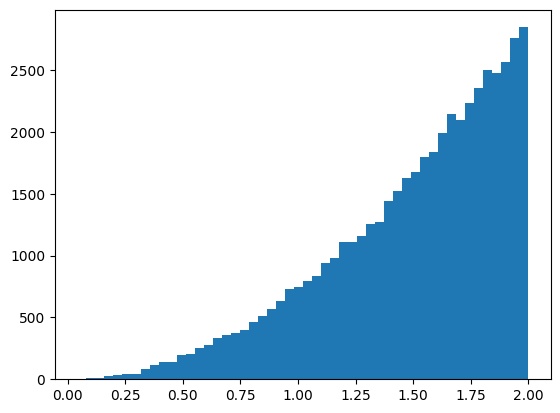

In [17]:
u = rng.uniform(0, 1, 50000)
x = np.array([(8.0 * x) ** (1.0 / 3.0) for x in u])
plt.hist(x, bins=50)

Looks like the graph of $x^2$!

## Inverse transform sampling using normally distributed random numbers

The fact that evaluating a uniform distribution function yields uniformly distributed values means that we can actually plug in random numbers from *any* distribution into $F^{-1}$! Given that two CDFS $F(X)$ and $G(Y)$ have the exact same uniform distribution, we can apply the inverse of $F^{-1}$ like we did before to find the mapping between $X$ and $Y$:

$$
F(X) = G(Y) \\
\therefore X = F^{-1}(G(Y))
$$

We can use this fact to generate random numbers in our earlier distribution $f(x)=x^2$ using normally distributed random numbers:

(array([   6.,   12.,   20.,   13.,   38.,   42.,   56.,   80.,  110.,
         124.,  155.,  187.,  201.,  247.,  260.,  305.,  349.,  376.,
         419.,  447.,  503.,  543.,  648.,  701.,  768.,  788.,  857.,
         921., 1021., 1023., 1123., 1184., 1236., 1324., 1393., 1468.,
        1593., 1667., 1763., 1902., 1960., 2064., 2099., 2265., 2330.,
        2508., 2570., 2660., 2806., 2865.]),
 array([0.03422157, 0.07353698, 0.11285238, 0.15216778, 0.19148319,
        0.23079859, 0.27011399, 0.3094294 , 0.3487448 , 0.38806021,
        0.42737561, 0.46669101, 0.50600642, 0.54532182, 0.58463722,
        0.62395263, 0.66326803, 0.70258344, 0.74189884, 0.78121424,
        0.82052965, 0.85984505, 0.89916046, 0.93847586, 0.97779126,
        1.01710667, 1.05642207, 1.09573747, 1.13505288, 1.17436828,
        1.21368369, 1.25299909, 1.29231449, 1.3316299 , 1.3709453 ,
        1.4102607 , 1.44957611, 1.48889151, 1.52820692, 1.56752232,
        1.60683772, 1.64615313, 1.68546853, 1.72478393, 

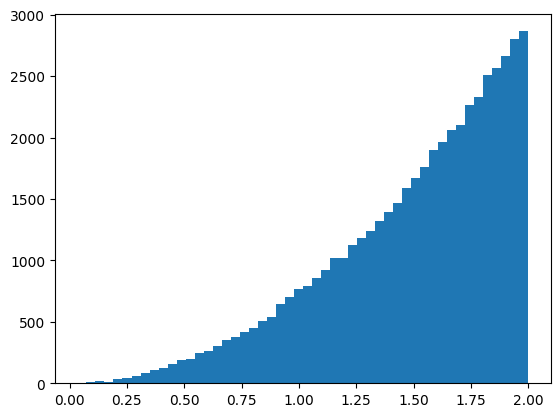

In [18]:
x = np.array([(8.0 * cdf_normal(x)) ** (1.0 / 3.0) for x in n])
plt.hist(x, bins=50)

And again, looks like a graph of $x^2$! I'm not sure why you would want to generate random numbers in a given distribution in such a contrived way, but it's nice to know that it is possible.